# Credit Risk Scorecard Project

This project builds a credit risk scorecard model to estimate the probability that a customer will default within two years.  

The scorecard approach is widely used in banking because it produces both a probability of default and an interpretable credit score.  

The following is the roadmap we follow for this project: 

- **Stage 1:** Setup & Data Load 
- **Stage 2:** SQL-based EDA  
- **Stage 3:** Data Cleaning & Feature Engineering  
- **Stage 4:** Build Scorecard Model  

## Stage 1: Setup and Data Load

In this stage, we prepare our environment and load the dataset.  

- We import the Python libraries we will use for data analysis  
- We connect to SQLite so that we can also practice using SQL queries  
- We then load the **Give Me Some Credit** dataset from Kaggle into pandas  

At the end of this stage, the data is available in Python and ready for exploration.  

###### ***We import the required Python libraries.***
###### - ***pandas: for handling and analyzing tabular data***  
###### - ***sqlite3: for creating and using a lightweight SQL database***

In [2]:
import pandas as pd
import sqlite3

###### ***We load the **Give Me Some Credit** dataset from Kaggle into a pandas DataFrame. This dataset contains information on customers such as age, income, number of dependents, and whether they defaulted within two years.***

In [3]:
df = pd.read_csv(r"C:\Users\shrad\OneDrive\Desktop\Credit-risk-portfolio\project-1-pd-scorecard\data\cs-training.csv")

###### ***We check the shape of the dataset, i.e., the number of rows (customers) and columns (variables).***

In [4]:
df.shape

(150000, 12)

###### ***We list all column names to see what variables are included in the dataset.***

In [5]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

###### ***We generate summary statistics (mean, median, min, max, etc.) for all numeric columns. This gives us a first look at the data distributions.*** 

In [6]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


###### ***We create a connection to a SQLite database file. This will allow us to save the dataset into a database table and later run SQL queries on it.***  

In [7]:
conn = sqlite3.connect("../data/creditrisk.db")

###### ***We attempt to save the DataFrame into the SQLite database as a table named credit_data.***

In [8]:
df.to_sql("credit_data", conn, if_exists="replace", index=False)

150000

###### ***We print all column names in a Python list format. This is another quick check to confirm that the dataset loaded correctly.***

In [9]:
print('Pandas_columns:', df.columns.tolist())

Pandas_columns: ['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [10]:
print(df.columns.tolist()) 

['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


###### ***We rename the unnamed index column to **ID** for clarity. This makes the dataset easier to work with, especially when saving to SQL.***


In [11]:
df.rename(columns= {'Unnamed: 0': 'ID'}, inplace = True)

In [12]:
print(df.columns.tolist())

['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


##### **Stage 1 Summary**

In this stage we successfully:  
- Imported the necessary Python libraries  
- Loaded the *Give Me Some Credit* dataset into pandas  
- Checked the dataset size, column names, and summary statistics  
- Created a SQLite database connection  
- (Optionally) saved the dataset into a SQL table for queries  
- Renamed the index column to **ID** for clarity  

At this point, our dataset is properly loaded and ready for further exploration.  

## Stage 2: SQL-based Exploratory Data Analysis

Now that the data is loaded into our SQLite database, we use SQL to understand what is in the table and to check a few business-critical facts.

What we want to learn:
1) What columns exist and what they are called  
2) How many rows we have and what the overall default rate is  
3) Whether there are unusual values in core fields such as age and utilization  
4) How many records have missing income or missing dependents  
5) How often customers were late by 30–59 days, 60–89 days, and 90+ days  
6) How many dependents customers have

These checks give us a clear picture of data quality and first-pass risk patterns before we build any model.

###### ***We connect to SQLite and save our pandas DataFrame as a table named credit_data. This gives us a simple database we can query with SQL inside the notebook.***


In [13]:
import sqlite3
conn = sqlite3.connect("../data/creditrisk.db")

###### ***We list the table schema.This shows every column in credit_data with its position and type so we know exactly what fields we can query.***

In [14]:
schema = pd.read_sql("PRAGMA table_info(credit_data);", conn)
print(schema)

    cid                                  name     type  notnull dflt_value  pk
0     0                            Unnamed: 0  INTEGER        0       None   0
1     1                      SeriousDlqin2yrs  INTEGER        0       None   0
2     2  RevolvingUtilizationOfUnsecuredLines     REAL        0       None   0
3     3                                   age  INTEGER        0       None   0
4     4  NumberOfTime30-59DaysPastDueNotWorse  INTEGER        0       None   0
5     5                             DebtRatio     REAL        0       None   0
6     6                         MonthlyIncome     REAL        0       None   0
7     7       NumberOfOpenCreditLinesAndLoans  INTEGER        0       None   0
8     8               NumberOfTimes90DaysLate  INTEGER        0       None   0
9     9          NumberRealEstateLoansOrLines  INTEGER        0       None   0
10   10  NumberOfTime60-89DaysPastDueNotWorse  INTEGER        0       None   0
11   11                    NumberOfDependents     RE

In [15]:
df.to_sql("credit_data", conn, if_exists="replace", index=False)

150000

###### ***We extract only the column names from the schema and print them as a quick list. This is a compact view that is easy to scan.***


In [16]:
cols = pd.read_sql("PRAGMA table_info(credit_data);", conn)
print("SQLite table columns:", cols["name"].tolist())


SQLite table columns: ['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


###### ***We preview five rows for key fields: the ID, the target flag SeriousDlqin2yrs, utilization, and age. This sanity-checks that the table loaded correctly and values look sensible.***

In [17]:
check = pd.read_sql(
    "SELECT ID, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age FROM credit_data LIMIT 5;",
    conn
)
print(check)

   ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age
0   1                 1                              0.766127   45
1   2                 0                              0.957151   40
2   3                 0                              0.658180   38
3   4                 0                              0.233810   30
4   5                 0                              0.907239   49


###### ***We store the column name list in a Python variable.This is optional and not required for the rest of the analysis.***

In [18]:
credit_table = ("SQLite table columns:", cols["name"].tolist())
print(credit_table)


('SQLite table columns:', ['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'])


###### ***We count how many rows are in the table. This confirms the dataset size we are working with.***

In [19]:
pd.read_sql("SELECT COUNT(*) as total_rows from credit_data;", conn)

,total_rows
0,150000


###### ***We calculate the overall default rate. The query counts how many customers are non-default (0) and default (1), and reports each as a percent of the full dataset.***

In [20]:
pd.read_sql(""" SELECT SeriousDlqin2yrs, COUNT(*) as count,
round(100* count(*)/ (select count(*) from credit_data),2) as percent
from credit_data 
group by SeriousDlqin2yrs;""", conn)

,SeriousDlqin2yrs,count,percent
0,0,139974,93.0
1,1,10026,6.0


###### ***We check the top five records by utilization. This helps us spot extreme or unusual values that may need capping in the cleaning stage.***

In [21]:
pd.read_sql("""
SELECT ID, RevolvingUtilizationOfUnsecuredLines, age
FROM credit_data
ORDER BY RevolvingUtilizationOfUnsecuredLines DESC
LIMIT 5;
""", conn)

,ID,RevolvingUtilizationOfUnsecuredLines,age
0,85490,50708.0,55
1,31415,29110.0,58
2,16957,22198.0,38
3,149161,22000.0,38
4,149280,20514.0,42


###### ***We summarize age with minimum, maximum, and average. This catches clearly invalid values such as age equal to zero and gives a sense of the customer profile.***

In [22]:
pd.read_sql("""
SELECT MIN(age) as min_age,
MAX(age) as max_age,
AVG(age) as avg_age
from credit_data as Age_distribution;""", conn)

,min_age,max_age,avg_age
0,0,109,52.295207


###### ***We count missing values in MonthlyIncome and NumberOfDependents.This tells us how much imputation we will need to do in the cleaning stage.***

In [23]:
pd.read_sql("""
SELECT
SUM(CASE WHEN MonthlyIncome is NULL THEN 1 ELSE 0 END) as missing_income,
SUM(CASE WHEN NumberOfDependents IS NULL THEN 1 ELSE 0 END) AS missing_dependents
from credit_data;
""", conn)

,missing_income,missing_dependents
0,29731,3924


###### ***We tabulate how many customers have been 30–59 days past due and how often. This shows the distribution of short delinquencies across the portfolio.***


In [24]:
pd.read_sql("""
SELECT 
    "NumberOfTime30-59DaysPastDueNotWorse" AS late_30_59,
    COUNT(*) AS count
FROM credit_data
GROUP BY "NumberOfTime30-59DaysPastDueNotWorse"
ORDER BY late_30_59;
""", conn)

,late_30_59,count
0,0,126018
1,1,16033
2,2,4598
3,3,1754
4,4,747
5,5,342
6,6,140
7,7,54
8,8,25
9,9,12


###### ***We tabulate how many customers have been 60–89 days past due and how often.***

In [25]:
pd.read_sql("""
SELECT 
    "NumberOfTime60-89DaysPastDueNotWorse" AS late_60_89,
    COUNT(*) AS count
FROM credit_data
GROUP BY "NumbOfTime60-89DaysPastDueNotWorse"
ORDER BY late_60_89;
""", conn)

,late_60_89,count
0,0,150000


###### ***We tabulate how many customers have been 90 or more days past due and how often. This is the most severe delinquency bucket and is usually highly predictive of risk.***

In [26]:
pd.read_sql("""
SELECT 
    NumberOfTimes90DaysLate AS late_90,
    COUNT(*) AS count
FROM credit_data
GROUP BY NumberOfTimes90DaysLate
ORDER BY late_90;
""", conn)

,late_90,count
0,0,141662
1,1,5243
2,2,1555
3,3,667
4,4,291
5,5,131
6,6,80
7,7,38
8,8,21
9,9,19


###### ***We look at a small cross-tab of the three delinquency measures together. This gives a quick sense of how often different late buckets occur in the same records.***

In [27]:
	pd.read_sql("""
	SELECT 
	    "NumberOfTime30-59DaysPastDueNotWorse" AS late_30_59,
	    "NumberOfTime60-89DaysPastDueNotWorse" AS late_60_89,
	    "NumberOfTimes90DaysLate" AS late_90,
	    COUNT(*) AS count
	FROM credit_data
	GROUP BY "NumberOfTime30-59DaysPastDueNotWorse",
	"NumberOfTime60-89DaysPastDueNotWorse",
	"NumberOfTimes90DaysLate"
	ORDER BY late_30_59,
	late_60_89,
	late_90
	LIMIT 10;
	""", conn)


,late_30_59,late_60_89,late_90,count
0,0,0,0,119637
1,0,0,1,2332
2,0,0,2,498
3,0,0,3,184
4,0,0,4,71
5,0,0,5,33
6,0,0,6,18
7,0,0,7,10
8,0,0,8,9
9,0,0,9,7


###### ***We count how many customers have zero, one, two, or more dependents. This gives context for missing dependent values and for later binning choices.***

In [28]:
pd.read_sql("""
SELECT NumberOfDependents as dependents,
COUNT(*) as count
from credit_data
GROUP BY NumberOfDependents
ORDER BY NumberOfDependents;
""", conn)

,dependents,count
0,NaN,3924
1,0.0,86902
2,1.0,26316
3,2.0,19522
4,3.0,9483
5,4.0,2862
6,5.0,746
7,6.0,158
8,7.0,51
9,8.0,24


##### **Stage 2 summary**

- We confirmed the table structure, counted rows, and measured the overall default rate.  
- We scanned age and utilization for unusual values.  
- We quantified missing income and dependents so we know how much imputation is needed.  
- We profiled delinquency counts across 30–59, 60–89, and 90+ day buckets, and reviewed the dependents distribution.  

These findings guide the next stage where we clean the data, cap outliers, and create business-friendly bins for modelling.

## Stage 3: Data Cleaning and Feature Engineering

In this stage we improve data quality and prepare features for modeling.  
From the SQL analysis we know there are missing values, unrealistic ages, extreme utilization, and very high delinquency counts.  
We handle these issues systematically and then create binned variables and Weight of Evidence (WoE) transformations that are suitable for logistic regression.

Steps in this stage:
- Handle missing values (income, dependents)
- Correct outliers (minimum age, maximum utilization, delinquency caps, dependents)
- Create grouped variables for age, income, and utilization
- Calculate Weight of Evidence (WoE) and Information Value (IV) for each variable
- Map WoE values back into the dataset as model-ready features

###### ***We compute the median MonthlyIncome so we have a stable business value to fill missing incomes without being influenced by extreme values.***

In [29]:
median_income= df["MonthlyIncome"].median()
print(median_income)

5400.0


###### ***We fill missing MonthlyIncome with the median so we keep customers in the dataset and avoid bias from very high or very low incomes.***

In [30]:
df["MonthlyIncome"]=df["MonthlyIncome"].fillna(median_income)

###### ***We count how many dependent values are missing so we know the size of the cleaning task before filling.***

In [31]:
print(df["NumberOfDependents"].isnull().sum())

3924


###### ***We fill missing NumberOfDependents with zero as a simple and transparent rule that keeps the dataset complete.***

In [32]:
df["NumberOfDependents"]=df["NumberOfDependents"].fillna(0)

###### ***We confirm that missing values for NumberOfDependents and MonthlyIncome are now resolved after the fills.***

In [33]:
print(df[["NumberOfDependents","MonthlyIncome"]].isnull().sum())

NumberOfDependents    0
MonthlyIncome         0
dtype: int64


###### ***We fix invalid ages by setting any age below eighteen to eighteen so the dataset reflects realistic adult customers.***

In [34]:
df.loc[df["age"] < 18, "age"] = 18

###### ***We confirm that there are no remaining customers with age below eighteen after the correction.***

In [35]:
print("Age < 18 now:", (df["age"]<18).sum())

Age < 18 now: 0


###### ***We cap credit utilisation at one hundred percent so extreme values do not distort the model.***

In [36]:
df.loc[df["RevolvingUtilizationOfUnsecuredLines"] > 1, "RevolvingUtilizationOfUnsecuredLines"] = 1.0

###### ***We confirm that no customers remain with utilization above one hundred percent after capping.***

In [37]:
print("Untilisation>1 now:", (df["RevolvingUtilizationOfUnsecuredLines"] > 1).sum())

Untilisation>1 now: 0


###### ***We confirm that no customers remain with utilization above one hundred percent after capping.***

In [38]:
print("Max utilisation now:", df["RevolvingUtilizationOfUnsecuredLines"].max())

Max utilisation now: 1.0


###### ***We check the maximum delinquency counts for 30–59, 60–89, and 90-plus-day late payments to identify extreme outliers.***

In [39]:
print("Max 30–59 late:", df["NumberOfTime30-59DaysPastDueNotWorse"].max())
print("Max 60–89 late:", df["NumberOfTime60-89DaysPastDueNotWorse"].max())
print("Max 90+ late  :", df["NumberOfTimes90DaysLate"].max())

Max 30–59 late: 98
Max 60–89 late: 98
Max 90+ late  : 98


###### ***We list customers with more than twenty 30–59 day late events to review extreme delinquency cases.***

In [40]:
print(df[df["NumberOfTime30-59DaysPastDueNotWorse"] > 20][["ID", "NumberOfTime30-59DaysPastDueNotWorse"]])

            ID  NumberOfTime30-59DaysPastDueNotWorse
1733      1734                                    98
2286      2287                                    98
3884      3885                                    98
4417      4418                                    98
4705      4706                                    98
...        ...                                   ...
147774  147775                                    98
149153  149154                                    98
149239  149240                                    98
149439  149440                                    98
149769  149770                                    98

[269 rows x 2 columns]


###### ***We cap the 30–59 day delinquency count at ten to limit the influence of extreme outliers.***

In [41]:
df["NumberOfTime30-59DaysPastDueNotWorse"] = (
    df["NumberOfTime30-59DaysPastDueNotWorse"].clip(upper=10)
)

###### ***We confirm that no customers remain with more than ten 30–59 day delinquency events.***

In [42]:
print(">10 in 30–59 now:",(df["NumberOfTime30-59DaysPastDueNotWorse"] > 10).sum())

>10 in 30–59 now: 0


###### ***We cap the 60–89 day delinquency count at ten to stabilize this variable.***

In [43]:
df["NumberOfTime60-89DaysPastDueNotWorse"] = (
    df["NumberOfTime60-89DaysPastDueNotWorse"].clip(upper=10)
)

###### ***We confirm that no customers remain with more than ten 60–89 day delinquency events.***

In [44]:
print(">10 in 60–89 now:",(df["NumberOfTime60-89DaysPastDueNotWorse"] > 10).sum())

>10 in 60–89 now: 0


###### ***We cap the 90 plus day delinquency count at ten to reduce the impact of extreme late cases.***

In [45]:
df["NumberOfTimes90DaysLate"] = (
    df["NumberOfTimes90DaysLate"].clip(upper=10)
)

###### ***We confirm that no customers remain with more than ten 90 plus day delinquency events.***

In [46]:
print(">10 in 90 now:",(df["NumberOfTimes90DaysLate"] > 10).sum())

>10 in 90 now: 0


###### ***We cap the number of dependents at six so extreme household sizes do not distort the model.***

In [47]:
df["NumberOfDependents"] = df["NumberOfDependents"].clip(upper=6)

###### ***We confirm that no customers remain with more than six dependents and print the new maximum.***

In [48]:
print("Dependents >6 now:", (df["NumberOfDependents"] >6).sum())

Dependents >6 now: 0


In [49]:
print ("Max dependents now:", df["NumberOfDependents"].max())

Max dependents now: 6.0


###### ***We create age groups using pd.cut so each customer is assigned to a clear age band.***

In [50]:
# Define bin edges
age_bins = [18, 25, 35, 45, 55, 65, 120]

# Define bin labels (must be one less than number of edges)
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Create the binned variable
df["age_bin"] = pd.cut( df["age"], bins = age_bins, labels = age_labels, right = True, include_lowest=True)

###### ***We count how many customers fall into each age group to confirm proper binning.***

In [51]:
# Check: how many rows per bin?
print(df["age_bin"].value_counts(dropna=False).sort_index())

age_bin
18-25     3028
26-35    18458
36-45    29819
46-55    36690
56-65    33406
66+      28599
Name: count, dtype: int64


###### ***We summarise default rates by age group to see how risk changes across age bands.***

In [52]:
# Summarise default behaviour by age bins
# Why: we want to see how many customers (n) and what % defaulted (bad_rate) in each bin
age_summary =  (
    df.groupby("age_bin", observed=False)["SeriousDlqin2yrs"]  # Step 1: group rows by age_bin 
    .agg(n="count", bad_rate= "mean")                          # Step 2: count customers, calculate mean (0/1 av dderage = % default)
    .reset_index()                                             # Step 3: make age_bin a normal column (not index), easier to use later
)
print(age_summary)

  age_bin      n  bad_rate
0   18-25   3028  0.111625
1   26-35  18458  0.111225
2   36-45  29819  0.088132
3   46-55  36690  0.075933
4   56-65  33406  0.045830
5     66+  28599  0.024127


###### ***We create income groups using quantile bins and calculate counts and default rates for each group.***

In [53]:
# Summarise default behaviour by income bins
# Why: income is skewed, so we use quantile bins (equal-sized groups) to see how default rates change across income levels

# Step 1: create 5 income bins using qcut (quintiles = 20% each)
df["income_bin"] = pd.qcut(
    df["MonthlyIncome"],        # column to bin
    q=5,                        # split into 5 groups of equal size
    duplicates = "drop")        # in case multiple bins have the same boundary

In [54]:
# Step 2: group by new bins and calculate counts + default rates
income_summary = (
    df.groupby("income_bin", observed=False)["SeriousDlqin2yrs"]
      .agg(n="count", bad_rate="mean")
      .reset_index()
)

print(income_summary)

            income_bin      n  bad_rate
0     (-0.001, 3400.0]  30289  0.092080
1     (3400.0, 5400.0]  59757  0.067457
2     (5400.0, 8250.0]  29961  0.060712
3  (8250.0, 3008750.0]  29993  0.046244


###### ***We create utilization groups with business friendly ranges such as 0–10 percent and 10–30 percent.***

In [55]:
util_bins = [0.0, 0.10, 0.30, 0.60, 1.00]       # bin edges
util_labels = ["0-10%", "10-30%", "30-60%", "60-100%"]  # readable labels

###### ***We summarise default rates by utilisation group to confirm strong risk patterns.***

In [56]:
df["util_bin"] = pd.cut(
    df["RevolvingUtilizationOfUnsecuredLines"],  # column to bin
    bins=util_bins,                              # our chosen cut points
    labels=util_labels,                          # assign labels to bins
    right=True,                                  # include the right edge (e.g., 0.10 in "0-10%")
    include_lowest=True                          # include 0.0 in the first bin
)

In [57]:
util_summary = (
    df.groupby("util_bin", observed=False)["SeriousDlqin2yrs"]
      .agg(n="count", bad_rate="mean")   # n = customers, mean = default rate
      .reset_index()
)

print(util_summary)

  util_bin      n  bad_rate
0    0-10%  64404  0.018104
1   10-30%  28478  0.031428
2   30-60%  21887  0.066798
3  60-100%  35231  0.184582


###### ***We build a detailed utilization table with customer counts, defaults, non defaults, and default rate.***

In [58]:
# Step 1 — Build a detailed count table for utilisation (goods/bads/total + basic rates)

util_detail = (
    df.groupby("util_bin", observed=False)["SeriousDlqin2yrs"]
      .agg(
          n="count",        # total customers in this bin
          bad_count="sum",  # number of defaults (sum of 0/1 target)
          bad_rate="mean"   # default rate = bad_count / n
      )
      .assign(
          good_count=lambda t: t["n"] - t["bad_count"]  # non-defaults = total - defaults
      )
      .reset_index()  # make 'util_bin' a normal column (not the index)
)

print(util_detail)

  util_bin      n  bad_count  bad_rate  good_count
0    0-10%  64404       1166  0.018104       63238
1   10-30%  28478        895  0.031428       27583
2   30-60%  21887       1462  0.066798       20425
3  60-100%  35231       6503  0.184582       28728


###### ***We calculate the distribution of good and bad customers across utilization groups to prepare for WoE and IV.***

In [59]:
# Step 2 : Add %Good and %Bad (distribution across the whole dataset)
EPS = 1e-6  
# total number of "good" customers in the whole dataset (target==0)
total_goods = (df["SeriousDlqin2yrs"] == 0).sum()

# total number of "bad" customers in the whole dataset (target==1)
total_bads  = (df["SeriousDlqin2yrs"] == 1).sum()

# share of ALL goods that fall into each util_bin
util_detail["dist_good"] = util_detail["good_count"] / max(total_goods, EPS)

# share of ALL bads that fall into each util_bin
util_detail["dist_bad"]  = util_detail["bad_count"]  / max(total_bads,  EPS)

# quick look
print(util_detail)

  util_bin      n  bad_count  bad_rate  good_count  dist_good  dist_bad
0    0-10%  64404       1166  0.018104       63238   0.451784  0.116298
1   10-30%  28478        895  0.031428       27583   0.197058  0.089268
2   30-60%  21887       1462  0.066798       20425   0.145920  0.145821
3  60-100%  35231       6503  0.184582       28728   0.205238  0.648614


###### ***We calculate WoE for each utilisation group and replace infinite values with zero to keep the feature stable.***

In [60]:
# Step 3 : Calculate WoE for util_bin
import numpy as np
# WoE = ln( dist_good / dist_bad ), with clipping so we never take log(0)
util_detail["woe"] = np.log(
    util_detail["dist_good"].clip(lower=EPS) /
    util_detail["dist_bad"].clip(lower=EPS)
)

# replace infinities that can appear in extreme edge cases with 0 (neutral evidence)
util_detail["woe"] = util_detail["woe"].replace([np.inf, -np.inf], 0.0)

print(util_detail[["util_bin","dist_good","dist_bad","woe"]])

  util_bin  dist_good  dist_bad       woe
0    0-10%   0.451784  0.116298  1.357051
1   10-30%   0.197058  0.089268  0.791856
2   30-60%   0.145920  0.145821  0.000679
3  60-100%   0.205238  0.648614 -1.150666


###### ***We calculate the IV contribution of each utilization group and sum them to measure the predictive power of the variable.***

In [61]:
# Step 4:  Compute IV per bin and total IV

# 1) IV contribution at the bin level
#    Formula: IV_bin = (dist_good - dist_bad) * woe

# 1) IV contribution at the bin level
#    Formula: IV_bin = (dist_good - dist_bad) * woe
util_detail["iv_bin"] = (
    (util_detail["dist_good"] - util_detail["dist_bad"]) * util_detail["woe"]
)

# 2) Total IV for the variable (sum across bins)
util_iv_total = util_detail["iv_bin"].sum()

# 3) Optional sanity checks (sum of distributions should be ~1.0)
sum_good = util_detail["dist_good"].sum()
sum_bad  = util_detail["dist_bad"].sum()

# 4) Display a compact view + totals
print(util_detail[["util_bin", "woe", "iv_bin"]])
print(f"Sum(dist_good) ≈ {sum_good:.6f},  Sum(dist_bad) ≈ {sum_bad:.6f}")
print(f"Total IV for utilization: {util_iv_total:.6f}")

  util_bin       woe        iv_bin
0    0-10%  1.357051  4.552721e-01
1   10-30%  0.791856  8.535428e-02
2   30-60%  0.000679  6.731310e-08
3  60-100% -1.150666  5.101772e-01
Sum(dist_good) ≈ 1.000000,  Sum(dist_bad) ≈ 1.000000
Total IV for utilization: 1.050804


###### ***We map WoE values back to each customer by utilization group and store them as the new variable util_woe.***

In [62]:
# Step 5: Create df["util_woe"] by mapping bin → WoE
# 1) Build a dictionary that maps each utilisation bin label to its WoE value

# We first build a dictionary that maps every utilisation bin label to its WoE value
# The keys are the exact labels in util_detail["util_bin"]
# The values are the numeric WoE values in util_detail["woe"]
util_woe_map = dict(zip(util_detail["util_bin"], util_detail["woe"]))

# We now apply the mapping from bin label to WoE on the df column util_bin
# The intermediate result may inherit a categorical dtype depending on how util_bin is stored
# To avoid categorical fill problems, we convert the result to a plain numeric dtype right away
mapped_util_woe = df["util_bin"].map(util_woe_map)

# Convert the mapped Series to float so it is no longer categorical
# This step ensures that fillna can safely insert the numeric value 0.0
mapped_util_woe = pd.to_numeric(mapped_util_woe, errors="coerce")

# Now we can safely replace any missing values with 0.0 which represents neutral evidence ln(1) equals 0
df["util_woe"] = mapped_util_woe.fillna(0.0)

# Quick diagnostics so you can see everything is correct without guessing
print("dtype of df['util_woe']:", df["util_woe"].dtype)
print("number of nulls in df['util_woe'] after fill:", int(df["util_woe"].isna().sum()))

# This check shows if there are any utilization bin labels present in df that were not in util_detail
# Such labels would map to NaN and then be set to 0.0 by the fill above
bins_in_df = set(df["util_bin"].dropna().unique())
bins_in_table = set(util_detail["util_bin"].dropna().unique())
missing_in_table = bins_in_df - bins_in_table
print("util_bin labels present in df but missing from util_detail:", missing_in_table)

# A small preview so you can visually confirm the mapping worked
print(df[["util_bin", "util_woe"]].head())

dtype of df['util_woe']: float64
number of nulls in df['util_woe'] after fill: 0
util_bin labels present in df but missing from util_detail: set()
  util_bin  util_woe
0  60-100% -1.150666
1  60-100% -1.150666
2  60-100% -1.150666
3   10-30%  0.791856
4  60-100% -1.150666


###### ***We build a detailed summary for each age group showing customer counts, default rate and non-defaults in the correct business order.***

In [63]:
# Age bin: 
# Step 1:

# We want to build a summary table for the binned age variable called age_bin
# The table should tell us how many customers are in each age bin
# How many of those defaulted, what the default rate is, and how many did not default
# Our target column is SeriousDlqin2yrs where one means default and zero means non default

age_detail = (
    # Group the dataset by the column age_bin
    # For each bin we look at the target column SeriousDlqin2yrs
    
    df.groupby("age_bin", observed=False)["SeriousDlqin2yrs"]
      .agg(
          n="count",        # n is the number of rows in this age bin
          bad_count="sum",  # bad_count is the number of defaults, sum of ones in this bin
          bad_rate="mean"   # bad_rate is the average of ones and zeros, which equals proportion of defaults
      )
      # Add another column good_count which is the number of non defaults
      # We calculate it as total n minus number of defaults
      .assign(good_count=lambda t: t["n"] - t["bad_count"])
      # Reset the index so age_bin becomes a normal column instead of the index
      .reset_index()
)

# If the age_bin column was created as a categorical with an order
# for example 18–25 then 26–35 then 36–45
# then we want our summary table to follow that natural order
# We check the dtype of age_bin and if it is categorical we reindex accordingly
if isinstance(df["age_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["age_bin"].cat.categories)  # this is the defined order of categories
    age_detail = (
        age_detail.set_index("age_bin")        # temporarily use age_bin as index
                  .reindex(cats)               # reorder rows to match the category order
                  .reset_index()               # bring age_bin back as a normal column
    )

# Finally we print the result
# The table should show one row per age_bin
# with n bad_count bad_rate and good_count
# and it should be in the expected order if categories were ordered
print(age_detail)

  age_bin      n  bad_count  bad_rate  good_count
0   18-25   3028        338  0.111625        2690
1   26-35  18458       2053  0.111225       16405
2   36-45  29819       2628  0.088132       27191
3   46-55  36690       2786  0.075933       33904
4   56-65  33406       1531  0.045830       31875
5     66+  28599        690  0.024127       27909


###### ***We calculate the share of all good and bad customers that fall in each age group and confirm the distributions sum to one.***

In [64]:
# Step 2:

# We are going to add two new columns to age_detail
# dist_good tells us what fraction of all non default customers fall into each age bin
# dist_bad tells us what fraction of all default customers fall into each age bin
# These are not within bin rates. They are shares across the whole dataset

# Define a tiny safety constant if it does not exist yet
# This prevents any division by zero in very sparse data situations
try:
    EPS
except NameError:
    EPS = 1e-6  # this equals 0.000001

# Compute totals across the entire dataset once
# SeriousDlqin2yrs equals one for default and zero for non default
total_goods = (df["SeriousDlqin2yrs"] == 0).sum()  # total number of non default rows in the dataset
total_bads  = (df["SeriousDlqin2yrs"] == 1).sum()  # total number of default rows in the dataset

# Create the distribution columns
# We divide each bin good_count by the total number of goods to get the share of goods in that bin
# We divide each bin bad_count by the total number of bads to get the share of bads in that bin
# The max with EPS ensures the denominator is never zero
age_detail["dist_good"] = age_detail["good_count"] / max(total_goods, EPS)
age_detail["dist_bad"]  = age_detail["bad_count"]  / max(total_bads,  EPS)

# Optional ordering to keep the natural order of bins if age_bin is an ordered categorical
# We use the modern check to avoid deprecation warnings
if isinstance(df["age_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["age_bin"].cat.categories)  # this is the intended order you defined when you created the bins
    age_detail = (
        age_detail.set_index("age_bin")
                  .reindex(cats)
                  .reset_index()
    )

# Sanity checks so you can trust the table
# The sums of dist_good and dist_bad across all bins should be about one
sum_dist_good = age_detail["dist_good"].sum()
sum_dist_bad  = age_detail["dist_bad"].sum()

# Display a compact view that includes the new columns
print(age_detail[["age_bin", "n", "good_count", "bad_count", "dist_good", "dist_bad"]])
print(f"Sum of dist_good across bins ≈ {sum_dist_good:.6f}")
print(f"Sum of dist_bad  across bins ≈ {sum_dist_bad:.6f}")

  age_bin      n  good_count  bad_count  dist_good  dist_bad
0   18-25   3028        2690        338   0.019218  0.033712
1   26-35  18458       16405       2053   0.117200  0.204768
2   36-45  29819       27191       2628   0.194258  0.262118
3   46-55  36690       33904       2786   0.242216  0.277878
4   56-65  33406       31875       1531   0.227721  0.152703
5     66+  28599       27909        690   0.199387  0.068821
Sum of dist_good across bins ≈ 1.000000
Sum of dist_bad  across bins ≈ 1.000000


###### ***We compute Weight of Evidence for each age group so positive values indicate safer bins and negative values indicate riskier bins.***

In [65]:
# Step 3:

# We will create a new column called woe in age_detail
# WoE stands for Weight of Evidence
# The formula is the natural log of the ratio of the good distribution to the bad distribution
# WoE equals ln of dist_good divided by dist_bad
# We clip the inputs to a tiny positive value so we never take the log of zero

# Define a tiny safety constant if it is not already defined
try:
    EPS
except NameError:
    EPS = 1e-6  # equals 0.000001

# Compute WoE for each age bin
age_detail["woe"] = np.log(
    age_detail["dist_good"].clip(lower=EPS) /
    age_detail["dist_bad"].clip(lower=EPS)
)

# Replace any positive or negative infinity with zero which represents neutral evidence
# We assign the result back to the column to avoid future warnings about inplace on a view
age_detail["woe"] = age_detail["woe"].replace([np.inf, -np.inf], 0.0)

# Optional ordering to keep the natural order of bins if age_bin is categorical
if isinstance(df["age_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["age_bin"].cat.categories)
    age_detail = (
        age_detail.set_index("age_bin")
                  .reindex(cats)
                  .reset_index()
    )

# Display a compact view so you can review the evidence direction and strength
# Positive WoE means the bin has a larger share of goods than bads and is safer
# Negative WoE means the bin has a larger share of bads than goods and is riskier
print(age_detail[["age_bin", "dist_good", "dist_bad", "woe"]])

  age_bin  dist_good  dist_bad       woe
0   18-25   0.019218  0.033712 -0.562024
1   26-35   0.117200  0.204768 -0.557991
2   36-45   0.194258  0.262118 -0.299612
3   46-55   0.242216  0.277878 -0.137349
4   56-65   0.227721  0.152703  0.399626
5     66+   0.199387  0.068821  1.063738


###### ***We calculate Information Value per age group and in total to measure how predictive age is for default risk.***

In [66]:
# Step 4:
# We now compute Information Value (IV) for each age bin and the total IV for the variable
# IV tells us how strong this variable is for separating good and bad customers
# The formula for IV at the bin level is (dist_good - dist_bad) multiplied by WoE

# Calculate IV contribution per bin
age_detail["iv_bin"] = (
    (age_detail["dist_good"] - age_detail["dist_bad"]) * age_detail["woe"]
)

# Calculate total IV for the whole age variable by summing across bins
age_iv_total = age_detail["iv_bin"].sum()

# Optional ordering to keep natural bin order if age_bin is categorical
if isinstance(df["age_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["age_bin"].cat.categories)
    age_detail = (
        age_detail.set_index("age_bin")
                  .reindex(cats)
                  .reset_index()
    )

# Display the result
# We show each bin with its WoE and IV contribution
# Finally we print the total IV so you can assess the overall predictive strength of age
print(age_detail[["age_bin", "woe", "iv_bin"]])
print(f"Total IV for age_bin: {age_iv_total:.6f}")

  age_bin       woe    iv_bin
0   18-25 -0.562024  0.008146
1   26-35 -0.557991  0.048862
2   36-45 -0.299612  0.020332
3   46-55 -0.137349  0.004898
4   56-65  0.399626  0.029979
5     66+  1.063738  0.138888
Total IV for age_bin: 0.251105


###### ***We map age group WoE back to each customer and verify that the new feature age_woe is numeric and complete.***

In [67]:
# Step 5:

# We will create a new column in df called age_woe
# This column will contain the Weight of Evidence value for each row based on its age_bin

# Build a dictionary that maps each age_bin label to its WoE value
# Keys are the bin labels such as "18-25" or "26-35"
# Values are the numeric WoE values we calculated in U3
age_woe_map = dict(zip(age_detail["age_bin"], age_detail["woe"]))

# Apply the mapping to the df column age_bin
# For each row this looks up the age_bin label and returns the WoE number
mapped_age_woe = df["age_bin"].map(age_woe_map)

# Convert to float to avoid issues with categorical dtype
mapped_age_woe = pd.to_numeric(mapped_age_woe, errors="coerce")

# Fill any missing values with 0.0
# This represents neutral evidence (log(1) = 0)
df["age_woe"] = mapped_age_woe.fillna(0.0)

# Quick checks so you can trust the result
print("dtype of df['age_woe']:", df["age_woe"].dtype)         # should be float
print("number of nulls in df['age_woe']:", df["age_woe"].isna().sum())  # should be 0
print(df[["age_bin", "age_woe"]].head())  # small preview of the mapping

dtype of df['age_woe']: float64
number of nulls in df['age_woe']: 0
  age_bin   age_woe
0   36-45 -0.299612
1   36-45 -0.299612
2   36-45 -0.299612
3   26-35 -0.557991
4   46-55 -0.137349


###### ***We build a detailed summary for each income group showing customer counts, defaults default rate and non defaults in the defined bin order.***

In [68]:
# Income_bin

# Step 1:
# We want a summary table for the binned income variable called income_bin
# The table should show how many rows are in each bin
# How many customers defaulted in that bin and what the default rate is
# It should also show how many customers did not default
# Our target column is SeriousDlqin2yrs where one means default and zero means non default

income_detail = (
    # Group the dataset by income_bin so we can compute statistics for each bin
    df.groupby("income_bin", observed=False)["SeriousDlqin2yrs"]
      .agg(
          n="count",        # n is the total number of rows in this income bin
          bad_count="sum",  # bad_count is the number of defaults since summing ones counts defaults
          bad_rate="mean"   # bad_rate is the average of zeros and ones which equals the default rate
      )
      # Add a column with the number of non defaults in the bin
      # This is the total n minus the number of defaults
      .assign(good_count=lambda t: t["n"] - t["bad_count"])
      # Reset the index so income_bin becomes a normal column instead of staying in the index
      .reset_index()
)

# If income_bin was created as a categorical with an intended order we keep that order in the table
# This makes the summary easier to read and consistent with your bin design
if isinstance(df["income_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["income_bin"].cat.categories)  # this is the intended order of income bins defined earlier
    income_detail = (
        income_detail.set_index("income_bin")     # temporarily move income_bin into the index
                      .reindex(cats)              # reorder rows according to the category order
                      .reset_index()              # bring income_bin back as a normal column
    )

# Print the finished U1 table for income
# It should show income_bin with n bad_count bad_rate and good_count
# For every row n should equal good_count plus bad_count
print(income_detail)

            income_bin      n  bad_count  bad_rate  good_count
0     (-0.001, 3400.0]  30289       2789  0.092080       27500
1     (3400.0, 5400.0]  59757       4031  0.067457       55726
2     (5400.0, 8250.0]  29961       1819  0.060712       28142
3  (8250.0, 3008750.0]  29993       1387  0.046244       28606


###### ***We calculate the share of all good and bad customers that fall in each income group and confirm the distributions sum to one.***

In [69]:
# Step 2:
# In this, we add two columns to income_detail
# dist_good tells us what fraction of all non default customers fall into each income bin
# dist_bad tells us what fraction of all default customers fall into each income bin
# These are not within bin rates but proportions across the entire dataset

# Define a small constant EPS if it does not already exist
# This prevents any division by zero in case a dataset has no goods or no bads
try:
    EPS
except NameError:
    EPS = 1e-6  # equals 0.000001

# Compute the total number of goods and bads in the whole dataset
# SeriousDlqin2yrs is the target where one means default and zero means non default
total_goods = (df["SeriousDlqin2yrs"] == 0).sum()  # number of non defaults in dataset
total_bads  = (df["SeriousDlqin2yrs"] == 1).sum()  # number of defaults in dataset

# Add the distribution columns
# Divide good_count in each bin by total_goods to get the share of all goods in that bin
# Divide bad_count in each bin by total_bads to get the share of all bads in that bin
# Use max with EPS to protect against division by zero
income_detail["dist_good"] = income_detail["good_count"] / max(total_goods, EPS)
income_detail["dist_bad"]  = income_detail["bad_count"]  / max(total_bads,  EPS)

# If income_bin is a categorical with a defined order, reindex to keep that order
if isinstance(df["income_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["income_bin"].cat.categories)
    income_detail = (
        income_detail.set_index("income_bin")
                     .reindex(cats)
                     .reset_index()
    )

# Check sums to make sure distributions are valid
sum_dist_good = income_detail["dist_good"].sum()
sum_dist_bad  = income_detail["dist_bad"].sum()

# Print the updated table with the new columns
print(income_detail[["income_bin", "n", "good_count", "bad_count", "dist_good", "dist_bad"]])
print(f"Sum of dist_good across bins ≈ {sum_dist_good:.6f}")
print(f"Sum of dist_bad  across bins ≈ {sum_dist_bad:.6f}")


            income_bin      n  good_count  bad_count  dist_good  dist_bad
0     (-0.001, 3400.0]  30289       27500       2789   0.196465  0.278177
1     (3400.0, 5400.0]  59757       55726       4031   0.398117  0.402055
2     (5400.0, 8250.0]  29961       28142       1819   0.201052  0.181428
3  (8250.0, 3008750.0]  29993       28606       1387   0.204367  0.138340
Sum of dist_good across bins ≈ 1.000000
Sum of dist_bad  across bins ≈ 1.000000


###### ***We calculate Weight of Evidence for each income group so positive values indicate safer groups and negative values indicate riskier groups.***

In [70]:
# Step 3 : Weight of Evidence (WoE).
# In this, we calculate Weight of Evidence (WoE) for each income bin
# The formula is WoE = ln(dist_good / dist_bad)
# ln means the natural logarithm with base e which is about 2.718
# Positive WoE means the bin has a higher share of goods than bads and is safer
# Negative WoE means the bin has a higher share of bads than goods and is riskier
# A value near zero means the bin is neutral

# Make sure the safety constant EPS exists
try:
    EPS
except NameError:
    EPS = 1e-6

# Compute WoE using the formula
# We clip the ratios at EPS to prevent taking log of zero
income_detail["woe"] = np.log(
    income_detail["dist_good"].clip(lower=EPS) /
    income_detail["dist_bad"].clip(lower=EPS)
)

# Replace infinite results with zero which represents neutral evidence
income_detail["woe"] = income_detail["woe"].replace([np.inf, -np.inf], 0.0)

# If income_bin is categorical, reorder to preserve the natural sequence of bins
if isinstance(df["income_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["income_bin"].cat.categories)
    income_detail = (
        income_detail.set_index("income_bin")
                     .reindex(cats)
                     .reset_index()
    )

# Show the results
# We display the distributions and their corresponding WoE values
print(income_detail[["income_bin", "dist_good", "dist_bad", "woe"]])

            income_bin  dist_good  dist_bad       woe
0     (-0.001, 3400.0]   0.196465  0.278177 -0.347772
1     (3400.0, 5400.0]   0.398117  0.402055 -0.009843
2     (5400.0, 8250.0]   0.201052  0.181428  0.102701
3  (8250.0, 3008750.0]   0.204367  0.138340  0.390198


###### ***We compute the Information Value per income group and in total to assess how predictive income is for default risk.***

In [71]:
# Step 4: Information Value (IV).
# In here, calculate the Information Value (IV) for each income bin
# IV tells us how strong this variable is for separating good and bad customers
# The formula for IV at the bin level is (dist_good - dist_bad) multiplied by WoE
# We then sum across all bins to get the total IV for income_bin

# Calculate the IV contribution for each bin
income_detail["iv_bin"] = (
    (income_detail["dist_good"] - income_detail["dist_bad"]) * income_detail["woe"]
)

# Calculate the total IV for income by summing over all bins
income_iv_total = income_detail["iv_bin"].sum()

# If income_bin is a categorical with a defined order we keep that order in the output
if isinstance(df["income_bin"].dtype, pd.CategoricalDtype):
    cats = list(df["income_bin"].cat.categories)
    income_detail = (
        income_detail.set_index("income_bin")
                     .reindex(cats)
                     .reset_index()
    )

# Show the results so we can interpret them
# We display each bin with its WoE and its IV contribution
# Finally we print the total IV for income_bin
print(income_detail[["income_bin", "woe", "iv_bin"]])
print(f"Total IV for income_bin: {income_iv_total:.6f}")

            income_bin       woe    iv_bin
0     (-0.001, 3400.0] -0.347772  0.028417
1     (3400.0, 5400.0] -0.009843  0.000039
2     (5400.0, 8250.0]  0.102701  0.002015
3  (8250.0, 3008750.0]  0.390198  0.025763
Total IV for income_bin: 0.056234


###### ***We map income group WoE back to each customer and verify that the new feature income_woe is numeric and complete.***

In [72]:
# Step 5: map WoE back into the dataset.
# We will create a new column in df called income_woe
# This column will hold the Weight of Evidence value for each row based on its income_bin

# Build a dictionary that maps each income_bin label to its WoE value
# Keys are the bin labels such as (-0.001, 3400.0] or (8250.0, 3008750.0]
# Values are the numeric WoE values we calculated in U3
income_woe_map = dict(zip(income_detail["income_bin"], income_detail["woe"]))

# Apply this mapping to the df column income_bin
# For each row we look up the WoE that corresponds to its income_bin
mapped_income_woe = df["income_bin"].map(income_woe_map)

# Convert to float to avoid issues if the series is categorical
mapped_income_woe = pd.to_numeric(mapped_income_woe, errors="coerce")

# Fill any missing values with 0.0 which represents neutral evidence (log(1) = 0)
df["income_woe"] = mapped_income_woe.fillna(0.0)

# Quick checks so we can trust the result
print("dtype of df['income_woe']:", df["income_woe"].dtype)           # should be float
print("number of nulls in df['income_woe']:", df["income_woe"].isna().sum())  # should be 0
print(df[["income_bin", "income_woe"]].head())  # preview of mapping

dtype of df['income_woe']: float64
number of nulls in df['income_woe']: 0
            income_bin  income_woe
0  (8250.0, 3008750.0]    0.390198
1     (-0.001, 3400.0]   -0.347772
2     (-0.001, 3400.0]   -0.347772
3     (-0.001, 3400.0]   -0.347772
4  (8250.0, 3008750.0]    0.390198


##### **Stage 3 Summary**

At the end of this stage:
- Missing MonthlyIncome values were filled with the median  
- Missing dependents were set to zero, and extreme household sizes were capped at six  
- Unrealistic ages below eighteen were corrected, and utilization was capped at one hundred percent  
- Extreme delinquency counts were capped at ten for each late-payment category  
- Age, income, and utilization were binned into interpretable groups  
- For each binned variable we calculated WoE and IV to measure predictive power  
- WoE values were mapped back to the dataset, creating the model-ready features `age_woe`, `income_woe`, and `util_woe`

The dataset is now clean, consistent, and fully transformed into features suitable for building a scorecard model.

## Stage 4: Build Scorecard Model

In this stage we build the actual credit risk scorecard model.  
We use logistic regression on the WoE-transformed features to predict the probability of default.  
Logistic regression is widely used in credit risk because it provides both a probability of default and coefficients that can be converted into an interpretable scorecard.

Steps in this stage:
- Train and test a logistic regression model on WoE features  
- Evaluate performance using AUC, ROC, and Precision-Recall curves  
- Tune probability cutoffs and compare trade-offs between recall, precision, and F1  
- Convert logistic regression coefficients into scorecard points  
- Compute customer-level credit scores and plot their distribution  

###### ***We train a logistic regression on WoE features hold out a test set score default probabilities report AUC choose a cutoff to create class predictions print the confusion matrix and a warning free classification report and show coefficients to explain direction and strength.***

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report


# Our goal is to train a logistic regression model on the WoE features
# We will report AUC which is threshold free and very useful for credit risk
# We will also print a confusion matrix and a classification report at a chosen cutoff
# We will silence the UndefinedMetricWarning by telling sklearn what to do when a class has no predicted samples

# Step 1
# We define our features and target
# The three features are the WoE transformed variables we created earlier
# The target SeriousDlqin2yrs has value one for default and zero for non default
woe_features = ["util_woe", "age_woe", "income_woe"]
X = df[woe_features].copy()
y = df["SeriousDlqin2yrs"].astype(int)

# Step 2
# We split the data into train and test sets
# We keep thirty percent for testing
# We use stratify to keep the default rate similar in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3
# We fit a logistic regression model
# We set max_iter to a higher value to ensure convergence
clf = LogisticRegression(max_iter=1000, solver="lbfgs")
clf.fit(X_train, y_train)

# Step 4
# We generate predicted probabilities of default on the test set
# predict_proba returns two columns and the second column corresponds to class one which is default
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Step 5
# We compute AUC which measures how well the model ranks bads ahead of goods
# AUC does not depend on any probability cutoff and is the primary metric in scorecard work
auc = roc_auc_score(y_test, y_pred_proba)

# Step 6
# We choose a probability cutoff to turn probabilities into class labels
# A cutoff of zero point five is the standard default but may be too conservative for imbalanced data
# You can experiment with a lower cutoff such as zero point two if recall for defaults is important
cutoff = 0.50
y_pred_class = (y_pred_proba >= cutoff).astype(int)

# Step 7
# We compute a confusion matrix which shows counts of true negatives false positives false negatives and true positives
cm = confusion_matrix(y_test, y_pred_class)

# Step 8
# We print a classification report without warnings by using zero_division
# When a class has no predicted samples precision for that class is undefined
# By setting zero_division to zero we tell sklearn to print zero for that precision instead of warning
report = classification_report(y_test, y_pred_class, zero_division=0)

# Step 9
# We look at model coefficients to understand direction and relative strength
# A positive coefficient means that increasing the feature increases the log odds of default
# A negative coefficient means that increasing the feature decreases the log odds of default
coef_table = pd.DataFrame({
    "feature": woe_features,
    "coefficient": clf.coef_[0]
}).sort_values("coefficient", ascending=False)

# Step 10
# We display all results together for easy reading
print(f"AUC on test set: {auc:.3f}")
print(f"Cutoff used for class prediction: {cutoff:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report without warnings:")
print(report)
print("\nModel Coefficients:")
print(coef_table)

AUC on test set: 0.783
Cutoff used for class prediction: 0.50

Confusion Matrix:
[[41992     0]
 [ 3008     0]]

Classification Report without warnings:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     41992
           1       0.00      0.00      0.00      3008

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.87      0.93      0.90     45000


Model Coefficients:
      feature  coefficient
1     age_woe    -0.458537
2  income_woe    -0.485656
0    util_woe    -0.937697


###### ***We plot the ROC curve to show how well the model separates good and bad customers across all cutoffs and display the AUC as the main scorecard metric.***

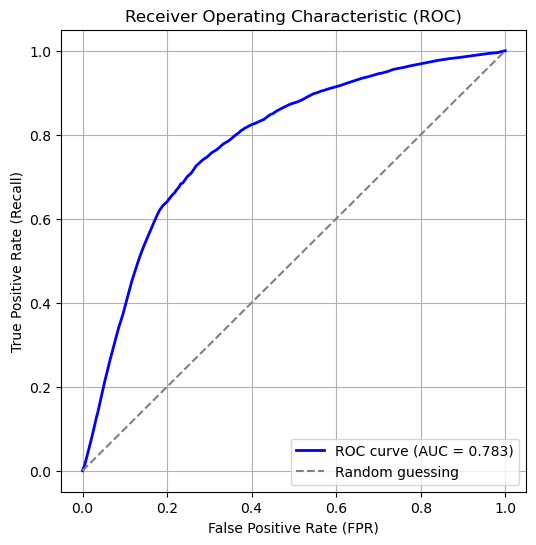

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# ROC Curve
# We use roc_curve to compute the false positive rate (FPR) and true positive rate (TPR) at many cutoffs
# fpr is on the x axis, tpr is on the y axis
# roc_auc is the numeric summary area under the curve, same as we already computed with roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--", label="Random guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###### ***We plot the Precision Recall curve to show how well the model identifies defaults in imbalanced data and report the average precision as a summary measure.***

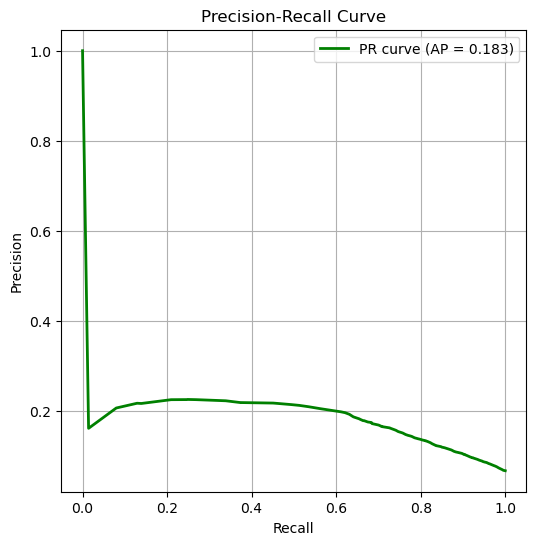

In [75]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall Curve
# precision tells us what fraction of predicted defaults are actually defaults
# recall tells us what fraction of actual defaults we managed to catch
# This curve is especially helpful in imbalanced data like credit scoring

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="green", lw=2,
         label=f"PR curve (AP = {avg_precision:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

###### ***We build a helper to evaluate many probability cutoffs compute metrics like precision recall specificity and F1 across them and store results in a table so we can later choose the best cutoff for business needs.***

In [76]:
#Cutoff tuning helper and metric grid
from sklearn.metrics import confusion_matrix

# We will evaluate many probability cutoffs between zero and one
# For each cutoff we will compute a set of metrics so we can see the trade offs clearly
# This helps us choose a threshold that fits our risk appetite

def metrics_at_cutoff(y_true, y_prob, cutoff):
    """
    We compute a confusion matrix at the given cutoff
    Then we compute precision recall specificity F1 and accuracy
    Returns a dictionary with all values for easy collection
    """
    y_pred = (y_prob >= cutoff).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()

    # Handle zero division gracefully
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0          # same as TPR
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0        # TNR
    accuracy  = (tp + tn) / max(len(y_true), 1)
    f1        = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    fpr       = 1.0 - specificity                                  # false positive rate

    return {
        "cutoff": cutoff,
        "tp": tp, "fp": fp, "tn": tn, "fn": fn,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "fpr": fpr,
        "accuracy": accuracy,
        "f1": f1
    }

# We build a grid of cutoffs from zero to one
# Step size of 0.01 gives us 101 points which is usually enough resolution
cutoffs = np.linspace(0.0, 1.0, 101)

# We compute all metrics for all cutoffs and collect them in a DataFrame
rows = [metrics_at_cutoff(y_test, y_pred_proba, c) for c in cutoffs]
cutoff_df = pd.DataFrame(rows)

# For convenience we also compute the prevalence which is the default rate in y_test
prevalence = y_test.mean()

# We show the first few rows so readers can see the structure
print(cutoff_df.head())
print(f"Default rate in test set prevalence ≈ {prevalence:.4f}")

   cutoff    tp     fp     tn   fn  precision    recall  specificity  \
0    0.00  3008  41992      0    0   0.066844  1.000000     0.000000   
1    0.01  3008  41992      0    0   0.066844  1.000000     0.000000   
2    0.02  2824  28496  13496  184   0.090166  0.938830     0.321395   
3    0.03  2577  19296  22696  431   0.117816  0.856715     0.540484   
4    0.04  2453  16119  25873  555   0.132081  0.815492     0.616141   

        fpr  accuracy        f1  
0  1.000000  0.066844  0.125312  
1  1.000000  0.066844  0.125312  
2  0.678605  0.362667  0.164530  
3  0.459516  0.561622  0.207146  
4  0.383859  0.629467  0.227340  
Default rate in test set prevalence ≈ 0.0668


###### ***We plot recall precision and F1 score against probability cutoffs to visualize the trade offs and support selecting a threshold that balances catching defaults and avoiding false alarms.***

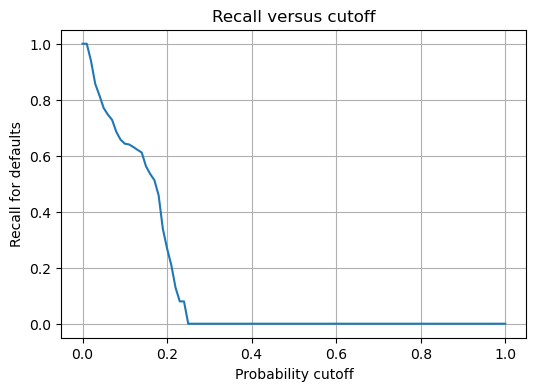

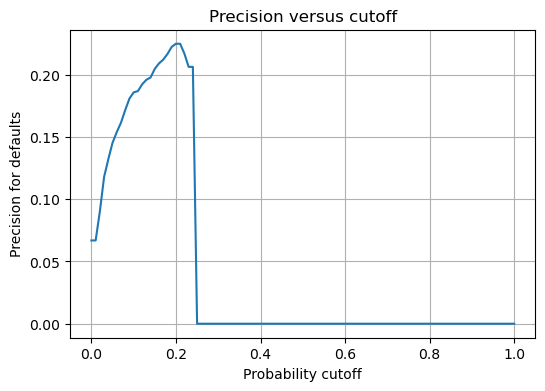

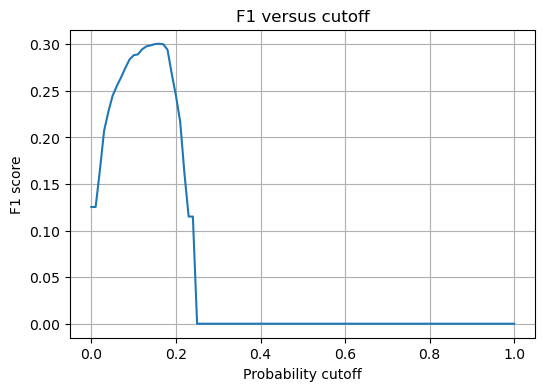

In [77]:
# Simple plots to see trade-offs
# Recall versus cutoff
plt.figure(figsize=(6,4))
plt.plot(cutoff_df["cutoff"], cutoff_df["recall"])
plt.xlabel("Probability cutoff")
plt.ylabel("Recall for defaults")
plt.title("Recall versus cutoff")
plt.grid(True)
plt.show()

# Precision versus cutoff
plt.figure(figsize=(6,4))
plt.plot(cutoff_df["cutoff"], cutoff_df["precision"])
plt.xlabel("Probability cutoff")
plt.ylabel("Precision for defaults")
plt.title("Precision versus cutoff")
plt.grid(True)
plt.show()

# F1 versus cutoff
plt.figure(figsize=(6,4))
plt.plot(cutoff_df["cutoff"], cutoff_df["f1"])
plt.xlabel("Probability cutoff")
plt.ylabel("F1 score")
plt.title("F1 versus cutoff")
plt.grid(True)
plt.show()


###### ***We identify the best probability cutoffs by three methods maximizing F1 maximizing Youden J and finding the smallest cutoff that achieves a recall target so we can choose based on business needs.***

In [78]:
# 1 We find the cutoff that maximizes F1
idx_f1 = cutoff_df["f1"].idxmax()
best_f1 = cutoff_df.loc[idx_f1, ["cutoff","precision","recall","f1","accuracy"]]

# 2 We find the cutoff that maximizes Youden J which is recall minus FPR
cutoff_df["youden_j"] = cutoff_df["recall"] - cutoff_df["fpr"]
idx_j = cutoff_df["youden_j"].idxmax()
best_j = cutoff_df.loc[idx_j, ["cutoff","precision","recall","fpr","youden_j","accuracy"]]

# 3 We pick the smallest cutoff that reaches a recall target
# You can change this target based on your risk appetite
recall_target = 0.60
meets = cutoff_df[cutoff_df["recall"] >= recall_target]
best_recall = meets.iloc[0][["cutoff","precision","recall","f1","accuracy"]] if not meets.empty else None

print("\nCutoff that maximizes F1")
print(best_f1.to_string())

print("\nCutoff that maximizes Youden J")
print(best_j.to_string())

if best_recall is not None:
    print(f"\nSmallest cutoff with recall at least {recall_target:.2f}")
    print(best_recall.to_string())
else:
    print(f"\nNo cutoff reached recall target {recall_target:.2f}. Consider lowering the target or improving the model.")


Cutoff that maximizes F1
cutoff       0.160000
precision    0.209015
recall       0.534907
f1           0.300579
accuracy     0.833600

Cutoff that maximizes Youden J
cutoff       0.070000
precision    0.161419
recall       0.727726
fpr          0.270813
youden_j     0.456913
accuracy     0.729089

Smallest cutoff with recall at least 0.60
cutoff       0.000000
precision    0.066844
recall       1.000000
f1           0.125312
accuracy     0.066844


###### ***We apply the chosen cutoff build class predictions and print the confusion matrix and classification report so we can see how model performance changes with a tuned threshold.***

In [79]:
# Apply the chosen cutoff and review the new confusion matrix
# We choose a cutoff based on the printed suggestions
# For example suppose the F1 optimum was around 0.22
chosen_cutoff = float(best_f1["cutoff"])

# We build class predictions at this cutoff
y_pred_class_tuned = (y_pred_proba >= chosen_cutoff).astype(int)

# We report the confusion matrix and classification report without warnings
cm = confusion_matrix(y_test, y_pred_class_tuned)
report = classification_report(y_test, y_pred_class_tuned, zero_division=0)

print(f"Chosen cutoff: {chosen_cutoff:.3f}")
print("\nConfusion Matrix at chosen cutoff")
print(cm)
print("\nClassification Report at chosen cutoff without warnings")
print(report)

Chosen cutoff: 0.160

Confusion Matrix at chosen cutoff
[[35903  6089]
 [ 1399  1609]]

Classification Report at chosen cutoff without warnings
              precision    recall  f1-score   support

           0       0.96      0.85      0.91     41992
           1       0.21      0.53      0.30      3008

    accuracy                           0.83     45000
   macro avg       0.59      0.69      0.60     45000
weighted avg       0.91      0.83      0.87     45000



###### ***We transform the logistic regression model into a scorecard by scaling coefficients into points define a base score add base points for the intercept and assign points to each bin of utilization age and income so every customer can be scored.***

In [80]:
# Build a scorecard table
# Step 1: Extract model coefficients and intercept
intercept = clf.intercept_[0]
coefs = dict(zip(woe_features, clf.coef_[0]))

print("Intercept:", intercept)
print("Coefficients:", coefs)

# Step 2: Define scaling parameters
# Base score = 600 points at odds = 50:1
# PDO (Points to Double Odds) = 50 points
base_score = 600
pdo = 50
odds = 50  # odds of good:bad at base score

# Scaling factor calculations
factor = pdo / np.log(2)
offset = base_score - factor * np.log(odds)

print(f"Scaling factor: {factor:.3f}, Offset: {offset:.3f}")

# Step 3: Build scorecard for each bin of each variable
scorecard_rows = []

for var, coef in coefs.items():
    # pick the corresponding detail table
    if var == "util_woe":
        detail = util_detail
        bin_col = "util_bin"
    elif var == "age_woe":
        detail = age_detail
        bin_col = "age_bin"
    elif var == "income_woe":
        detail = income_detail
        bin_col = "income_bin"
    else:
        continue

    for _, row in detail.iterrows():
        bin_label = row[bin_col]
        woe = row["woe"]
        # points formula: -coef * woe * factor
        # negative sign because higher risk should lower score
        points = -coef * woe * factor
        scorecard_rows.append([var, bin_label, woe, coef, round(points, 0)])

# Step 4: Put into a DataFrame
scorecard = pd.DataFrame(scorecard_rows,
                         columns=["Variable", "Bin", "WoE", "Coefficient", "Points"])

# Step 5: Add base points row for intercept
base_points = round(offset + (-intercept * factor), 0)
scorecard = pd.concat([pd.DataFrame([["Base", "All customers", "-", intercept, base_points]],
                                    columns=scorecard.columns),
                       scorecard])

# Display the scorecard
print("\nCredit Scorecard:")
print(scorecard)

Intercept: -2.6360458516729097
Coefficients: {'util_woe': -0.9376973674094201, 'age_woe': -0.45853715126204264, 'income_woe': -0.48565620170183926}
Scaling factor: 72.135, Offset: 317.807

Credit Scorecard:
      Variable                  Bin       WoE  Coefficient  Points
0         Base        All customers         -    -2.636046   508.0
0     util_woe                0-10%  1.357051    -0.937697    92.0
1     util_woe               10-30%  0.791856    -0.937697    54.0
2     util_woe               30-60%  0.000679    -0.937697     0.0
3     util_woe              60-100% -1.150666    -0.937697   -78.0
4      age_woe                18-25 -0.562024    -0.458537   -19.0
5      age_woe                26-35 -0.557991    -0.458537   -18.0
6      age_woe                36-45 -0.299612    -0.458537   -10.0
7      age_woe                46-55 -0.137349    -0.458537    -5.0
8      age_woe                56-65  0.399626    -0.458537    13.0
9      age_woe                  66+  1.063738    -0.4585

###### ***We convert WoE values into per customer points add base points and sum them into a final credit score then print samples and summary stats to verify everything is numeric and sensible.***

In [81]:
# Compute customer-level credit scores
# We will compute per customer points from each WoE variable and then add base points

# Step 1
# We reuse model pieces from the previous scorecard step
# These must already exist in your session:
#   coefs    a dict like {"util_woe": ..., "age_woe": ..., "income_woe": ...}
#   intercept the logistic regression intercept
#   factor and offset which came from the chosen base score and PDO scaling
# If any of these are missing from memory please rerun the scorecard construction cell first

# Step 2
# We build map dictionaries from bin label to WoE for each variable
util_woe_by_bin   = dict(zip(util_detail["util_bin"],   util_detail["woe"]))
age_woe_by_bin    = dict(zip(age_detail["age_bin"],     age_detail["woe"]))
income_woe_by_bin = dict(zip(income_detail["income_bin"], income_detail["woe"]))

# Step 3
# We map each row’s bin to its WoE and immediately coerce to float
# pd.to_numeric with errors equal to "coerce" guarantees a float Series with NaN for any unmapped label
util_woe_series   = pd.to_numeric(df["util_bin"].map(util_woe_by_bin),   errors="coerce")
age_woe_series    = pd.to_numeric(df["age_bin"].map(age_woe_by_bin),     errors="coerce")
income_woe_series = pd.to_numeric(df["income_bin"].map(income_woe_by_bin), errors="coerce")

# Step 4
# We convert WoE to points using the standard scorecard formula
# points equals negative beta times WoE times factor so that safer bins add points and riskier bins subtract points
util_points   = -coefs["util_woe"]   * util_woe_series   * factor
age_points    = -coefs["age_woe"]    * age_woe_series    * factor
income_points = -coefs["income_woe"] * income_woe_series * factor

# Step 5
# We replace any NaN with zero because missing WoE means neutral evidence for scoring
# We also round to the nearest integer for a neat scorecard look
df["util_points"]   = np.round(np.nan_to_num(util_points,   nan=0.0), 0).astype(float)
df["age_points"]    = np.round(np.nan_to_num(age_points,    nan=0.0), 0).astype(float)
df["income_points"] = np.round(np.nan_to_num(income_points, nan=0.0), 0).astype(float)

# Step 6
# We compute base points once for everyone from the intercept and scaling constants
# base_points equals offset plus negative intercept times factor
base_points_value = np.round(offset + (-intercept * factor), 0).astype(float)
df["base_points"] = base_points_value

# Step 7
# We now add everything together as pure numeric columns
df["credit_score"] = (
    df["base_points"].astype(float)
    + df["util_points"].astype(float)
    + df["age_points"].astype(float)
    + df["income_points"].astype(float)
)

# Step 8
# We print a small sample and a summary so we can verify that everything is numeric and sensible
print("dtypes:")
print(df[["base_points","util_points","age_points","income_points","credit_score"]].dtypes)

print("\nfirst five rows:")
print(df[["util_bin","util_points","age_bin","age_points","income_bin","income_points","base_points","credit_score"]].head())

print("\nscore distribution:")
print(df["credit_score"].describe())

dtypes:
base_points      float64
util_points      float64
age_points       float64
income_points    float64
credit_score     float64
dtype: object

first five rows:
  util_bin  util_points age_bin  age_points           income_bin  \
0  60-100%        -78.0   36-45       -10.0  (8250.0, 3008750.0]   
1  60-100%        -78.0   36-45       -10.0     (-0.001, 3400.0]   
2  60-100%        -78.0   36-45       -10.0     (-0.001, 3400.0]   
3   10-30%         54.0   26-35       -18.0     (-0.001, 3400.0]   
4  60-100%        -78.0   46-55        -5.0  (8250.0, 3008750.0]   

   income_points  base_points  credit_score  
0           14.0        508.0         434.0  
1          -12.0        508.0         408.0  
2          -12.0        508.0         408.0  
3          -12.0        508.0         532.0  
4           14.0        508.0         439.0  

score distribution:
count    150000.000000
mean        544.367113
std          76.142240
min         399.000000
25%         489.000000
50%         57

###### ***We plot a histogram of the final credit scores to visualize how customers are spread across the score range.***

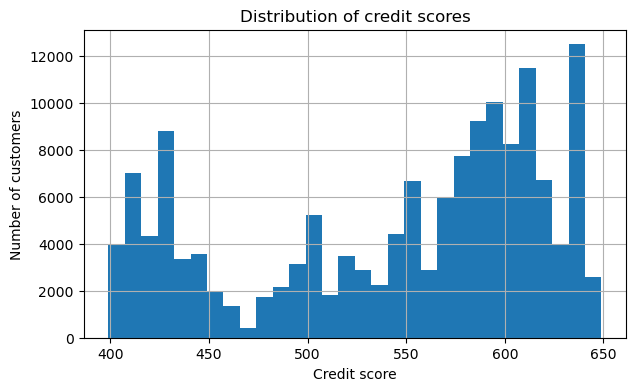

In [82]:
import matplotlib.pyplot as plt

# We draw a histogram so we can see how scores are distributed
plt.figure(figsize=(7,4))
plt.hist(df["credit_score"], bins=30)
plt.xlabel("Credit score")
plt.ylabel("Number of customers")
plt.title("Distribution of credit scores")
plt.grid(True)
plt.savefig("../reports/credit_score_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

##### **Stage 4 Summary**

At the end of this stage:
- We trained a logistic regression model on WoE features for utilization, age, and income  
- We evaluated performance with AUC (ranking power), ROC, and Precision-Recall curves (for imbalanced data)  
- We tuned cutoffs to balance recall, precision, and overall accuracy  
- We transformed the logistic regression into a scorecard with base points and bin-level points  
- Each customer now has a final credit score, and we plotted the distribution to see how customers are spread across the score range  

The dataset is now fully scored, and we are ready to package the project for presentation and sharing.